In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [4]:
from tensorflow import keras

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [10]:
df = keras.datasets.fashion_mnist

In [11]:
(X_train, y_train), (X_test, y_test) = df.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
labels=['T-shirts','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [15]:
X_train=X_train[:50000]

In [16]:
X_val=X_train[50000:]

In [17]:
y_train=y_train[:50000]

In [18]:
y_val=y_train[50000:]

In [19]:
X_train=X_train/255

In [20]:
X_val=X_val/255

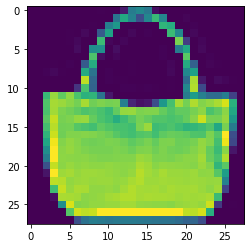

In [21]:
plt.imshow(X_train[100])

In [22]:
print(labels[y_train[100]])

Bag


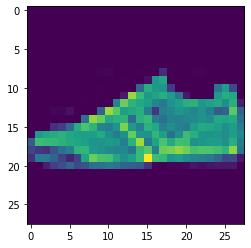

In [23]:
plt.imshow(X_train[1055])

In [24]:
print(labels[y_train[1055]])

Sneaker


In [25]:
keras_model = keras.models.Sequential()

In [26]:
keras_model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [27]:
keras_model.add(keras.layers.Dense(200, activation="relu"))

In [28]:
keras_model.add(keras.layers.Dense(100, activation="relu"))

In [29]:
keras_model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
keras_model.compile(optimizer="sgd",loss=keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [31]:
history = keras_model.fit(X_train, y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7522 - accuracy: 0.7526
Epoch 2/10
50000/50000 [==============================] - 2s 42us/sample - loss: 0.5016 - accuracy: 0.8272
Epoch 3/10
50000/50000 [==============================] - 2s 39us/sample - loss: 0.4546 - accuracy: 0.8400
Epoch 4/10
50000/50000 [==============================] - 2s 42us/sample - loss: 0.4248 - accuracy: 0.8527
Epoch 5/10
50000/50000 [==============================] - 2s 41us/sample - loss: 0.4050 - accuracy: 0.8571
Epoch 6/10
50000/50000 [==============================] - 2s 42us/sample - loss: 0.3879 - accuracy: 0.8634
Epoch 7/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3755 - accuracy: 0.8670
Epoch 8/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3635 - accuracy: 0.8704
Epoch 9/10
50000/50000 [==============================] - 2s 48us/sample - loss: 0.3530 - accuracy: 0.8744
Epoch 10/10
50

In [32]:
X_test=X_test/255

In [33]:
test_accuracy=keras_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.4462 - accuracy: 0.8386


In [34]:
keras_model.save("keras_model.h5")

In [35]:
loaded_model = keras.models.load_model("keras_model.h5")

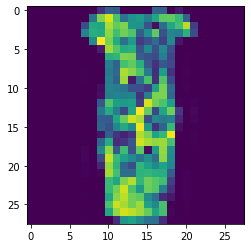

In [36]:
plt.imshow(X_test[100])

In [37]:
print(labels[y_test[100]])

Dress


In [38]:
new_image= X_test[100]

In [40]:
new_image = keras.preprocessing.image.img_to_array(new_image)

In [41]:
new_image = np.expand_dims(new_image, axis=0)

In [42]:
new_image = new_image.reshape(1,28,28)

In [43]:
prediction=labels[loaded_model.predict_classes(new_image)[0]]

In [44]:
print(prediction)

Dress


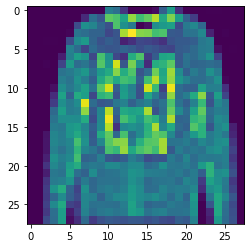

In [45]:
plt.imshow(X_test[500])

In [46]:
print(labels[y_test[500]])

Pullover


TF ind deployment

Another way of productionizing the machine learning model is to use the Kubeflow platform. Kubeflow is a native tool for managing and deploying machine learning models on Kubernetes. Kubernetes can be defined as a container orchestration platform that allows for the running, deployment, and management of containerized applications (machine learning models, in our case).

In this section, we will replicate the same model that we built previously and run it in the cloud (via Google Cloud Platform), using Kubeflow. We will also use the Kubeflow UI, to navigate and run Jupyter Notebook in the cloud. Because we are going to use Google Cloud Platform (GCP), we must have a Google account, so that we can avail ourselves of the free credits provided by Google for the use of GCP components. Go to https://console.cloud.google.com/ and create a Google user account, if you do not have one already

import numpy as np
import tensorflow as tf

In [4]:
sample_n = 200
features_n = 2
iteration = 100
cluster_n = 3
points=np.random.uniform(0, 20, (sample_n, features_n))

In [9]:
points.shape

(200, 2)

In [10]:
points[0,]

array([ 0.84800869, 13.29853243])

In [11]:
points[-1,]

array([14.2952756 , 10.41552461])

In [12]:
samples=tf.constant(points)

In [15]:
initial_centroids=tf.slice(tf.random.shuffle(samples), [0,0], [cluster_n,-1])

In [16]:
initial_centroids

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[18.96589255, 10.19784411],
       [11.87546821,  5.66870234],
       [13.59167906,  8.2191311 ]])>

In [17]:
X=points[:, 0]

In [18]:
Y=points[:, 1]

In [19]:
sess = tf.Session ()

AttributeError: module 'tensorflow' has no attribute 'Session'